<a href="https://colab.research.google.com/github/hzy86/UWCourseWork/blob/master/EE%20447%20-%20Control%20System/ece447_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 2 : Ziyi Huang
===

Python and Cruise Control

**<span style="color: darkgreen">Due Sunday April 14 at 11:59pm</span>**

**Instructions:** Make a copy of this notebook that you can edit and save. If you are using CoLab, that means clicking File>Save and then "SAVE A COPY IN DRIVE". Then, for each problem, insert your answers directly underneath the problem description as one or more `Code` or `Markdown` cells as appropriate. Every code cell should execute without errors. TAs and graders may not have resources to debug your code. When you are satisfied with your answers upload your notebook to canvas. 

**Relevant Reading**

- Python Introduction [here](https://www.w3schools.com/python/python_intro.asp). Make a link to this page to use as a reference.
- ECE447 Lecture on Cruise Control (April 8)

In [0]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
import math
%matplotlib inline

1) Basic Python
---

**a)** Write a function called `approx_derivative` that approximates the derivative of a function. Its definition should look like:
```python
def approx_derivative(f,a,h):
    # Your code here
```
Use the [definition of the derivative](https://en.wikipedia.org/wiki/Derivative) (see the section titled "Rigorous definition") at $a$ as the slope of $f(a)$ near $a$, except without the limit. Show the results of testing your function to compute approximations of the derivative of `np.sin` at `a=0` with `h = 1, 0.1, 0.01, 0.001`. The approximations should get closer and closer to 1. 

In [0]:
def approx_derivative(f, a, h):
  return (f(a + h) - f(a)) / h

print(approx_derivative(np.sin, 0, 1))
print(approx_derivative(np.sin, 0, 0.1))
print(approx_derivative(np.sin, 0, 0.01))
print(approx_derivative(np.sin, 0, 0.001))

0.8414709848078965
0.9983341664682815
0.9999833334166665
0.9999998333333416


**b)** Write a function called `approx_integral` that approximates the integral of a function. Its definition should look like:
```python
def approx_integral(f,x1,x2,delta):
    # Your code here
```
and should use the approximation to the definite integral as a sum of the areas of rectangles with base ranging from `x` to `x+delta` and height `f(x)` as x goes from `x1` to `x2` in steps of size `delta`. Show the results of testing your function to compute approximations of the integral of `np.sin` from `0` to $\pi$ with `delta = 1, 0.1, 0.01, 0.001`. The approximations should get closer and closer to 2. 

In [0]:
def approx_integral(f, x1, x2, delta):
  space = np.arange(x1, x2, delta)
  res = 0
  for x in range(len(space)):
    res += (delta * abs(f(x)))
  return res

print(approx_integral(np.sin, 0, math.pi, 1))
print(approx_integral(np.sin, 0, math.pi, 0.1))
print(approx_integral(np.sin, 0, math.pi, 0.01))
print(approx_integral(np.sin, 0, math.pi, 0.001))

1.8918884196934453
1.992545178720028
1.999238436210042
2.0000747940979933


2) Plotting
---

**a)** Make a 2x2 grid plot of the following functions:

- $y = -t$ 
- $y = 1 - e^{-t}$ 
- $y = 1 - t e^{-t}$ 
- $y = 1 - e^{-t} \sin(5t)$ 

Let $t$ range from $0$ to $10$. Label each x axis by $t$ and y axis with $y$. 

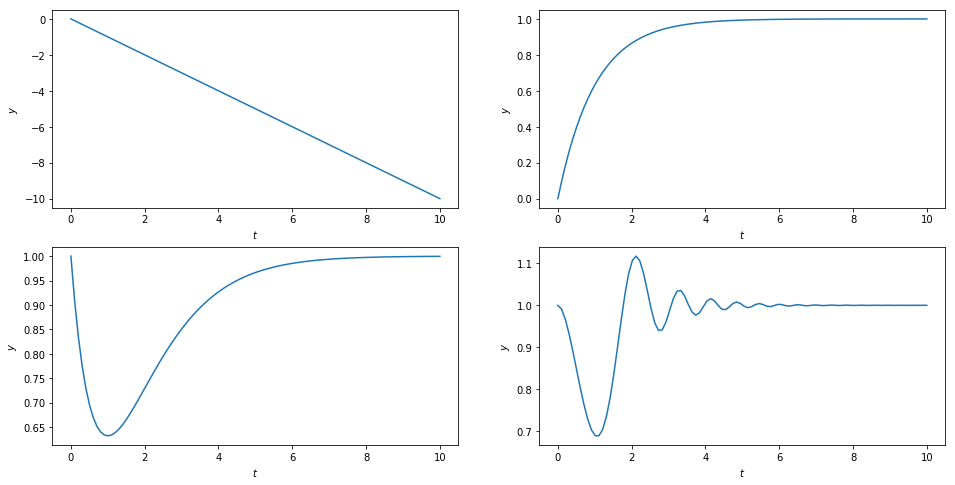

In [0]:
def y1(t):
  return -t

def y2(t):
  return 1 - np.exp(-t)

def y3(t):
  return 1 - t * np.exp(-t)

def y4(t):
  return 1 - np.exp(-t) * np.sin(t * t)

t = np.linspace(0, 10, 100)
fig, ax = plt.subplots(2, 2, figsize=(16, 8))

ax[0][0].plot(t, y1(t))
ax[0][1].plot(t, y2(t))
ax[1][0].plot(t, y3(t))
ax[1][1].plot(t, y4(t))

plots = ax.reshape(-1)
for i in range(len(plots)):
  plots[i].set_xlabel('$t$')
  plots[i].set_ylabel('$y$')

**b)** Make a *single* plot of the functions

> $y = 1 - e^{-\omega t} \sin(\omega t)$ 

as $\omega$ goes from $0$ to $1$ (inclusive) in steps of $0.25$. Put all five curves on top of each other. Label your axes and make a legend with curves labeled by, for example, $\omega$ = 0.25, etc.

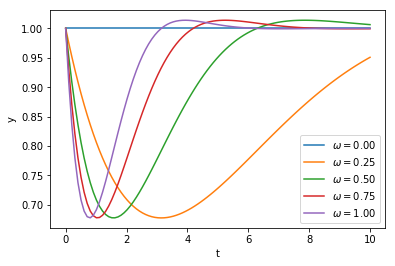

In [0]:
def steps(w, t):
  return 1 - np.exp(-w * t) * np.sin(w * t)

s1 = steps(0.00, t)
s2 = steps(0.25, t)
s3 = steps(0.50, t)
s4 = steps(0.75, t)
s5 = steps(1.00, t)

plt.plot(t, s1, label="$\omega=0.00$")
plt.plot(t, s2, label="$\omega=0.25$")
plt.plot(t, s3, label="$\omega=0.50$")
plt.plot(t, s4, label="$\omega=0.75$")
plt.plot(t, s5, label="$\omega=1.00$")

plt.xlabel("t")
plt.ylabel("y")

plt.legend();


3) Sensitivity 
---

Consder the system 

> $\dot x = k \; u - x$

where $k$ is an unknown parameter with estimate $k_{est}$ and actual value $k_{actual}$. 

**a)** Find an open loop control law (a constant) for $u$ that makes the steady state  $x_{ss}$ equal to a desired state $x_{des}$.

**b)** Find $x_{ss}$ in terms of $k_{est}$ and $k_{actual}$ and explain what happens to $x_{ss}$ upon a 10% change in $k$. Plot $x_{ss}$ as a function of $k_{actual}$ as $k_{actual}$ goes from

> $0.9 k_{est}$ 

to 

> $1.1 k_{est}$.

Assume $k_{est} = 10$. *Label and title your plot!*.

**c)** Find a proportional controller for $u$ that makes the steady state $x_{ss}$ equal to a desired state $x_{des}$.

**d)** Find the steady state velocity $x_{ss}$ in terms of $k_{est}$, $k_{actual}$, and $K_P$. Explain what happens to $x_{ss}$ when $K_P$ increases and what happens as it goes to infinity. 

**e)** Suppose $x_{des} = 1$ and $k_{est} = 10$ and $k_{actual} = 9$. Find a value for $K_P$, call it $K_P^*$, that makes $|x_{ss} - x_{des}| < 0.01$. Make a plot of $x_{ss}$ as $K_P$ varies from $0$ to $K_P^*$.  

**(a)**
$u=\frac{x_{des}}{k}$ 

since $\dot x = 0$ and $x = x_{des}=x_{ss}$ when $x_{ss}=x_{des}$

**(b)** 
Plug in $u=\frac{x_{des}}{k}$

>$\dot{x}=\frac{x_{des}}{k_{est}}k_{actual}-x=\frac{k_{actual}}{k_{est}}x_{des}-x$

so 
>$x_{ss}=\frac{k_{actual}}{k_{est}}x_{des}$

10% error in $k$ will result in 10% error in $v_{ss}$

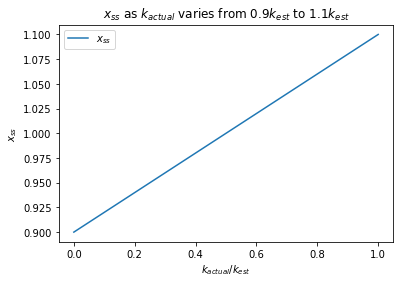

In [0]:
def sens(k_act):
  k_est = 10
  x = 1
  return k_act /k_est * x

k_act = np.linspace(9, 11, 100)
plt.plot(x, sens(k_act), label="$x_{ss}$");

plt.title("$x_{ss}$ as $k_{actual}$ varies from $0.9k_{est}$ to $1.1k_{est}$")
plt.xlabel("$k_{actual}/k_{est}$")
plt.ylabel("$x_{ss}$");
plt.legend();



**(c)** 

Use a negative feeback control

>$e=x_{des}-x$

so 

>$u=u_{ff}+K_{P}e=\frac{x_{des}}{k}+K_{P}(x_{dex}-x)$

**(d)** 

>$\dot{x}=\frac{k_{actual}}{k_{est}}x_{des}+K_{P}k_{actual}(x_{dex}-x)-x=k_{actual}(\frac{1}{k_{est}}+K_{p})x_{des}-(K_{P}k_{actual}+1)x$

>$x_{ss}=\frac{k_{actual}(\frac{1}{k_{est}}+K_{p})}{(K_{P}k_{actual}+1)}x_{des}$

as $K_{P}$ increases, the effects of $1$ in the denominator and the error of $k$ in the numerator become less, so $x_{ss}$ becomes closer to $x_{des}$. When $K_P=\infty$, $x_{ss}=x_{des}$

**(e)** I choose $K_P^*=10$

|xss-xdes|= 0.001098901098900984


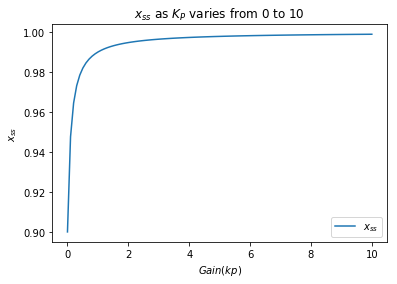

In [0]:
def prop(xdes, kact, kest, kp):
  return (kact / kest + kact * kp) / (kp * kact + 1) * xdes

kpa = 10
print("|xss-xdes|=", 1 - prop(1, 9, 10, kpa))

kp = np.linspace(0, kpa, 100)

plt.plot(kp, prop(1, 9, 10, kp), label = "$x_{ss}$")
plt.title("$x_{ss}$ as $K_{P}$ varies from 0 to 10")
plt.xlabel("$Gain(kp)$")
plt.ylabel("$x_{ss}$");
plt.legend();